# La problematica 

Predecir reclamaciones en una empresa del ramo de telefonia, con enfoque en el servicio de Internet de tipo HFC (Hybrid Fiber-Coaxial), para reducir la tasa de churn, de cara a oferecer un mejor servicio al usuario.

Objetivo: 

* El objetivo central del proyecto es desarrollar un modelo predictivo que sea capaz de anticipar si un cliente realizará una reclamación en la empresa de teleco.

Por medio de este modelo predictivo se busca obtener resultados que no solo permitan predecir reclamaciones, sino también desarrollar estrategias personalizadas para mejorar la recompensa por medio del cliente y retención de usuarios. Es importante destacar que prevenir problemas es mucho más rentable que abordar reclamaciones, el coste medio que supone para las empresas de telecomunicaciones atender y resolver una reclamación es de 15 euros.

Ganancias Esperadas: 

* Reducción de Reclamaciones.
* Mejora de la Satisfacción del Cliente.
* Ahorro de Costos.
* Incremento en las Ganancias.
* Ciclo de Vida del Cliente Prolongado.
* Ventaja Competitiva.


# 1) Importación de librerias

In [1]:
# Importaremos algunas bibliotecas que sabemos que son necesarias en la mayoría de los proyectos de 
# machine learning, o en casi todo caso.

import pandas as pd
import numpy as np
from numpy import mean, std
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
warnings.filterwarnings('ignore')

# 2) Data

### Descripcion del Dataset

El conjunto de datos utilizado está en formato CSV y consta de 66 columnas en total. De estas, 60 columnas son atributos de entrada, abordando diferentes aspectos como las características técnicas relacionadas con el equipamiento y la señal del cliente, así como variables de servicio que reflejan el consumo del servicio por parte de los clientes. Además, se incluyen variables de interacción que cuentan el número de reclamaciones realizadas. El dataset también contiene la variable objetivo (variable target), que indica  si un cliente presentará una reclamación en los próximos 7 días.

El conjunto de datos proviene de una empresa de telecomunicaciones europea, aunque se mantiene anónima en el proyecto por solicitud de la entidad. Todos los valores en el dataset son de naturaleza numérica, y el propósito principal es permitir la construcción de un modelo predictivo. La cantidad total de filas en el conjunto de datos es de 100,000, lo que brinda una amplia base de datos para el análisis y desarrollo del modelo.

In [2]:
# Leemos las primeras filas del archivo para obtener una vista muy básica y además, identificar el separador comun.
with open("telco_dataset.csv", encoding='latin1') as f:
    for _ in range(3):
        print(f.readline())

,anomaly_rate_reboots,anomaly_rate_cpu,anomaly_rate_docsis30,anomaly_rate_docsis31,anomaly_score,model_segment_id,prediction_probability,model_artifact_reference,sum_bytes_up_sum_m5d_0d,sum_bytes_down_sum_m5d_0d,offline_sum_m5d_0d,green_sum_m5d_0d,sum_bytes_up_sum_m9d_0d,sum_bytes_down_sum_m9d_0d,offline_sum_m9d_0d,green_sum_m9d_0d,sysuptime_min_min_m9d_0d,sysuptime_max_max_m9d_0d,utilization_mean_m9d_0d,sum_bytes_up_sum_m17d_0d,sum_bytes_down_sum_m17d_0d,offline_sum_m17d_0d,green_sum_m17d_0d,sysuptime_min_min_m17d_0d,sysuptime_max_max_m17d_0d,utilization_mean_m17d_0d,sum_bytes_up_sum_m32d_0d,sum_bytes_down_sum_m32d_0d,offline_sum_m32d_0d,green_sum_m32d_0d,pts_last_3d,complaints_last_3d,interactions_last_3d,ots_last_3d,with_anomaly_last_3d,pts_last_7d,complaints_last_7d,interactions_last_7d,ots_last_7d,with_anomaly_last_7d,pts_last_15d,complaints_last_15d,interactions_last_15d,ots_last_15d,with_anomaly_last_15d,pts_last_30d,complaints_last_30d,interactions_last_30d,ots_last_30d,with_an

In [3]:
# Cargamos el archivo CSV en un objeto DataFrame.

data = pd.read_csv("telco_dataset.csv")
print("Lineas y columnas")
print(data.shape)

Lineas y columnas
(100000, 67)


In [4]:
# Leemos las primeras filas del DataFrame para obtener una idea más general de los tipos de variables que contiene.

data.head(5)

,Unnamed: 0,anomaly_rate_reboots,anomaly_rate_cpu,anomaly_rate_docsis30,anomaly_rate_docsis31,anomaly_score,model_segment_id,prediction_probability,model_artifact_reference,sum_bytes_up_sum_m5d_0d,...,pts_sum_0d_0d,ots_sum_0d_1d,pts_sum_0d_1d,ots_sum_0d_3d,pts_sum_0d_3d,ots_sum_0d_7d,pts_sum_0d_7d,ots_sum_0d_15d,pts_sum_0d_15d,available_day_id
0,0,0.000000,0.0,0.000000,NaN,0.000000,0,0.197269,1096a68140834ac58be6f68faa08091a,1.326975e+08,...,0,0,0,0,1,0,1,0,1,20230301
1,1,0.000000,0.0,0.015152,NaN,0.007576,0,0.352598,1096a68140834ac58be6f68faa08091a,5.079729e+08,...,0,0,0,0,0,0,0,1,1,20230301
2,2,0.000000,0.0,0.000000,NaN,0.000000,0,0.368716,1096a68140834ac58be6f68faa08091a,3.045637e+07,...,0,0,0,0,0,0,0,1,1,20230301
3,3,0.692308,0.0,0.000000,NaN,0.138462,0,0.381013,1096a68140834ac58be6f68faa08091a,3.350157e+09,...,0,0,0,0,0,0,0,0,1,20230301
4,4,0.461538,0.0,0.000000,NaN,0.092308,0,0.252477,1096a68140834ac58be6f68faa08091a,1.094692e+08,...,1,0,1,0,1,0,1,0,1,20230301



## Información de los datos

* El dataset contiene dos tipos de variables: variables de tipo interacción técnico e interacción cliente.
* Variable a predecir (Variable target): pts_sum_0d_7d

##### 1ª Variables de interaccion Técnica:

* PTS: Esta variable indica la participación técnica de un cliente, es decir, cuando un cliente se comunica con la empresa por razones técnicas (futuro).

* OTS: Representa la variable de mantenimiento dentro del período estimado, es decir, un mantenimiento planificado que se realizará en el futuro (futuro).

* Unnamed: Esta variable "Unnamed" se eliminará del conjunto de datos ya que se trata de un índice duplicado y no contiene información relevante.

* Anomaly Rate Reboots: Esta variable es un resumen de varias variables relacionadas con reinicios de dispositivos, donde "reboot" se refiere a cuando un usuario apaga o reinicia el enrutador. Los valores van de 0 a 1, donde 0 indica un servicio excelente y 1 indica un servicio muy deficiente.

* Anomaly Rate CPU: Similar a "Anomaly Rate Reboots", pero se refiere a la cantidad de uso de CPU y memoria del enrutador.

* Anomaly Rate DOCSIS 3.0 y DOCSIS 3.1: Estas variables hacen referencia a la cantidad de señales relacionadas con la potencia de la señal que recibe el usuario, la relación señal/ruido, el número de errores. La diferencia entre DOCSIS 3.0 y 3.1 es que este último es más avanzado.

* [ELIMINAR] Anomaly: Esta variable es un resumen de todas las anomalías en el sistema, y el modelo proporcionará resultados similares.

* Model_Segmento_: Identifica el tipo de equipo del cliente, con valores de 0 a 3, donde 0 representa el equipo más antiguo y 3 el más nuevo.

* Model_Artifact_Referenc/Prediction_Probability: Esta variable no se incluyó en el preprocesamiento de datos y, por lo tanto, no se utilizará.

* Utilization_Mean_M9D_0D: Representa cuánto utiliza el cliente el servicio. Sin embargo, esta variable presenta problemas de consistencia y datos erróneos.

* Sum_Bytes_Up_Sum_M5D_0D: Indica la cantidad total de datos subidos por el cliente en los últimos 5 días.

* Sum_Bytes_Down_Sum_M5D_0D: Indica la cantidad total de datos descargados por el cliente en los últimos 5 días.

* Offline_Sum_M5D_0D: Muestra la cantidad de veces que el cliente quedó sin servicio de Internet en los últimos 5 días.

* Green_Sum_M5D_0D: Representa la cantidad de veces que el cliente tuvo una conexión "verde" (buena calidad de servicio de Internet).

* Sysuptime_Min_Min_M9D_0D: Indica el tiempo mínimo que el equipo del cliente permaneció encendido.

* Sysuptime_Max_Max_M9D_0D: Indica el tiempo máximo que el equipo del cliente permaneció encendido.

* Green_Sum_M32D_0D: Hace referencia a un bloque de variables relacionadas con aspectos técnicos, como el dispositivo o el servicio.

#### 2ª Variables de Interacción del Cliente con la Empresa:

* PTS_Last_3D: Representa las quejas de los usuarios en los últimos 3 días por problemas técnicos.

* Complaints_Last_3D: Hace referencia a las quejas formales, como aquellas presentadas ante un organismo regulador.

* Interactions_Last_3D: Incluye cualquier comunicación del cliente con la empresa en los últimos 3 días.

* OTS_Last_3D: Indica las actividades de mantenimiento realizadas en los últimos 3 días.

* With_Anomaly_Last_3D: Representa situaciones en las que se realizó mantenimiento y se detectó un problema.

* PTS_Last_7D: Muestra quejas de los usuarios dentro de los últimos 7 días por problemas técnicos.

Esta descripción que presenta los aspectos más importantes del dataset, mucho de lo que varia en las demas variables son los dias de amuestras.

# 3) Análisis Exploratorio de Datos (EDA)

#### 3.1 Remoción de variables

In [5]:
print(list[data.columns])

list[Index(['Unnamed: 0', 'anomaly_rate_reboots', 'anomaly_rate_cpu',
       'anomaly_rate_docsis30', 'anomaly_rate_docsis31', 'anomaly_score',
       'model_segment_id', 'prediction_probability',
       'model_artifact_reference', 'sum_bytes_up_sum_m5d_0d',
       'sum_bytes_down_sum_m5d_0d', 'offline_sum_m5d_0d', 'green_sum_m5d_0d',
       'sum_bytes_up_sum_m9d_0d', 'sum_bytes_down_sum_m9d_0d',
       'offline_sum_m9d_0d', 'green_sum_m9d_0d', 'sysuptime_min_min_m9d_0d',
       'sysuptime_max_max_m9d_0d', 'utilization_mean_m9d_0d',
       'sum_bytes_up_sum_m17d_0d', 'sum_bytes_down_sum_m17d_0d',
       'offline_sum_m17d_0d', 'green_sum_m17d_0d', 'sysuptime_min_min_m17d_0d',
       'sysuptime_max_max_m17d_0d', 'utilization_mean_m17d_0d',
       'sum_bytes_up_sum_m32d_0d', 'sum_bytes_down_sum_m32d_0d',
       'offline_sum_m32d_0d', 'green_sum_m32d_0d', 'pts_last_3d',
       'complaints_last_3d', 'interactions_last_3d', 'ots_last_3d',
       'with_anomaly_last_3d', 'pts_last_7d', 'compla

Lo primero que realizaremos es la eliminación de columnas que no aportan valor a nuestro modelo. Por ejemplo, "Unnamed: 0", que es un índice duplicado, 'anomaly_score', ya que el modelo nos proporcionará un puntaje de anomalía, 'prediction_probability', que proviene de un modelo anterior y podría generar conflictos, 'ots_sum_0d_0d' y 'pts_sum_0d_0d', que contienen información de cero días.

In [6]:
data = data.drop(['Unnamed: 0', 'anomaly_score', 'prediction_probability', 'model_artifact_reference',
                  'ots_sum_0d_0d', 'pts_sum_0d_0d', 'ots_sum_0d_1d', 'pts_sum_0d_1d','ots_sum_0d_3d',
                  'pts_sum_0d_3d','ots_sum_0d_7d',  'ots_sum_0d_15d', 'pts_sum_0d_15d',
                  'available_day_id'], axis = 1)

#### 3.2 Manipulación de variables 

In [7]:
# Buscamos identificar si hay alguna columna que no este configurada como numerica
columnas_no_numericas = data.select_dtypes(exclude=[np.number]).columns.tolist()

# Mostrar las columnas no numéricas
print("Columnas no numéricas:")
print(columnas_no_numericas)

Columnas no numéricas:
[]


model_artifact_reference' es la columna que se refiere al modelo del dispositivo. La convertiremos en categorica y la manipularemos posteriormente utilizando variables ficticias (dummy variables).

In [8]:
# Frecuencia de valores unicos 

data['model_segment_id'].value_counts()

model_segment_id
3    42522
0    24360
2    18918
1    14200
Name: count, dtype: int64

In [9]:
# Cambiamos el tipo de objeto al que le corresponde

data['model_segment_id'] = data['model_segment_id'].astype('category')

#### 3.3 Estructura del DataFrame

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 53 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   anomaly_rate_reboots        100000 non-null  float64 
 1   anomaly_rate_cpu            99919 non-null   float64 
 2   anomaly_rate_docsis30       99999 non-null   float64 
 3   anomaly_rate_docsis31       61435 non-null   float64 
 4   model_segment_id            100000 non-null  category
 5   sum_bytes_up_sum_m5d_0d     100000 non-null  float64 
 6   sum_bytes_down_sum_m5d_0d   100000 non-null  float64 
 7   offline_sum_m5d_0d          100000 non-null  int64   
 8   green_sum_m5d_0d            100000 non-null  int64   
 9   sum_bytes_up_sum_m9d_0d     100000 non-null  float64 
 10  sum_bytes_down_sum_m9d_0d   100000 non-null  float64 
 11  offline_sum_m9d_0d          100000 non-null  int64   
 12  green_sum_m9d_0d            100000 non-null  int64   
 13  

#### 3.4 Resumen Descriptivo

In [11]:
# Descriptivos basicos

data.describe()

,anomaly_rate_reboots,anomaly_rate_cpu,anomaly_rate_docsis30,anomaly_rate_docsis31,sum_bytes_up_sum_m5d_0d,sum_bytes_down_sum_m5d_0d,offline_sum_m5d_0d,green_sum_m5d_0d,sum_bytes_up_sum_m9d_0d,sum_bytes_down_sum_m9d_0d,...,complaints_last_30d,interactions_last_30d,ots_last_30d,with_anomaly_last_30d,pts_1y,complaints_1y,interactions_1y,ots_1y,with_anomaly_1y,pts_sum_0d_7d
count,100000.000000,99919.000000,99999.000000,61435.000000,1.000000e+05,1.000000e+05,100000.000000,100000.000000,1.000000e+05,1.000000e+05,...,45270.000000,45270.000000,45270.000000,45270.000000,45270.00000,45270.000000,45270.000000,45270.000000,45270.000000,100000.000000
mean,0.060440,0.010602,0.018569,0.026284,3.075256e+09,3.412564e+10,1.263000,88.804200,6.100348e+09,6.733590e+10,...,0.012591,3.762182,0.166468,0.151248,3.18562,0.035984,15.383079,0.177601,0.160968,0.589190
std,0.121262,0.056938,0.037244,0.049632,1.327324e+10,5.171646e+10,6.757833,18.481475,2.586590e+10,9.597882e+10,...,0.131670,3.789083,0.521458,0.494941,4.32861,0.296003,15.460240,0.540361,0.511850,0.491983
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,3.103910e+08,4.392887e+09,0.000000,91.000000,6.842278e+08,9.573434e+09,...,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.037942e+09,1.690384e+10,0.000000,94.000000,2.191322e+09,3.493606e+10,...,0.000000,3.000000,0.000000,0.000000,2.00000,0.000000,12.000000,0.000000,0.000000,1.000000
75%,0.076923,0.000000,0.015152,0.038462,2.673484e+09,4.391102e+10,0.000000,95.000000,5.518349e+09,8.861069e+10,...,0.000000,5.000000,0.000000,0.000000,4.00000,0.000000,20.000000,0.000000,0.000000,1.000000
max,1.000000,0.828571,0.530303,0.423077,1.200894e+12,1.683958e+12,96.000000,122.000000,2.025861e+12,3.300628e+12,...,4.000000,109.000000,8.000000,8.000000,103.00000,34.000000,633.000000,8.000000,8.000000,1.000000


Podemos observar varias características con la función 'describe', pero lo que nos llama la atención es que las columnas no se encuentran en la misma escala. Lo que mas adelante, trataremos.

#### 3.5 Tratamiento de valores nulos

In [12]:
# Presenta el total de nulos por todo el dataframe

data.isnull().sum().sum()

1406897

Es importante tener en cuenta que el dataset está dividido en dos grupos: interacción técnica e interacción con el cliente. La presencia de valores nulos a menudo se debe a la falta de una de las dos, o incluso a ambas, en un rango de días. Nuevamente, varias variables suman los días en los que hubo algún tipo de interacción, pudiendo extenderse hasta un año.

In [13]:
# Identificamos las variables con valores faltantes
columnas_con_valores_faltantes = data.columns[data.isnull().any()].tolist()

# Salvamos la lista en un DataFrame
nulo = data[columnas_con_valores_faltantes]

# Ahora vizualizamos el valor por cada colmna
nulo.isnull().sum()

anomaly_rate_cpu            81
anomaly_rate_docsis30        1
anomaly_rate_docsis31    38565
pts_last_3d              54730
complaints_last_3d       54730
interactions_last_3d     54730
ots_last_3d              54730
with_anomaly_last_3d     54730
pts_last_7d              54730
complaints_last_7d       54730
interactions_last_7d     54730
ots_last_7d              54730
with_anomaly_last_7d     54730
pts_last_15d             54730
complaints_last_15d      54730
interactions_last_15d    54730
ots_last_15d             54730
with_anomaly_last_15d    54730
pts_last_30d             54730
complaints_last_30d      54730
interactions_last_30d    54730
ots_last_30d             54730
with_anomaly_last_30d    54730
pts_1y                   54730
complaints_1y            54730
interactions_1y          54730
ots_1y                   54730
with_anomaly_1y          54730
dtype: int64

In [14]:
# Rellenamos todos los nulos con ceros
data = data.fillna(0)

# 4) Vizualizacion 

In [15]:
colores = sns.color_palette("rainbow")

#### 4.1 Correlación

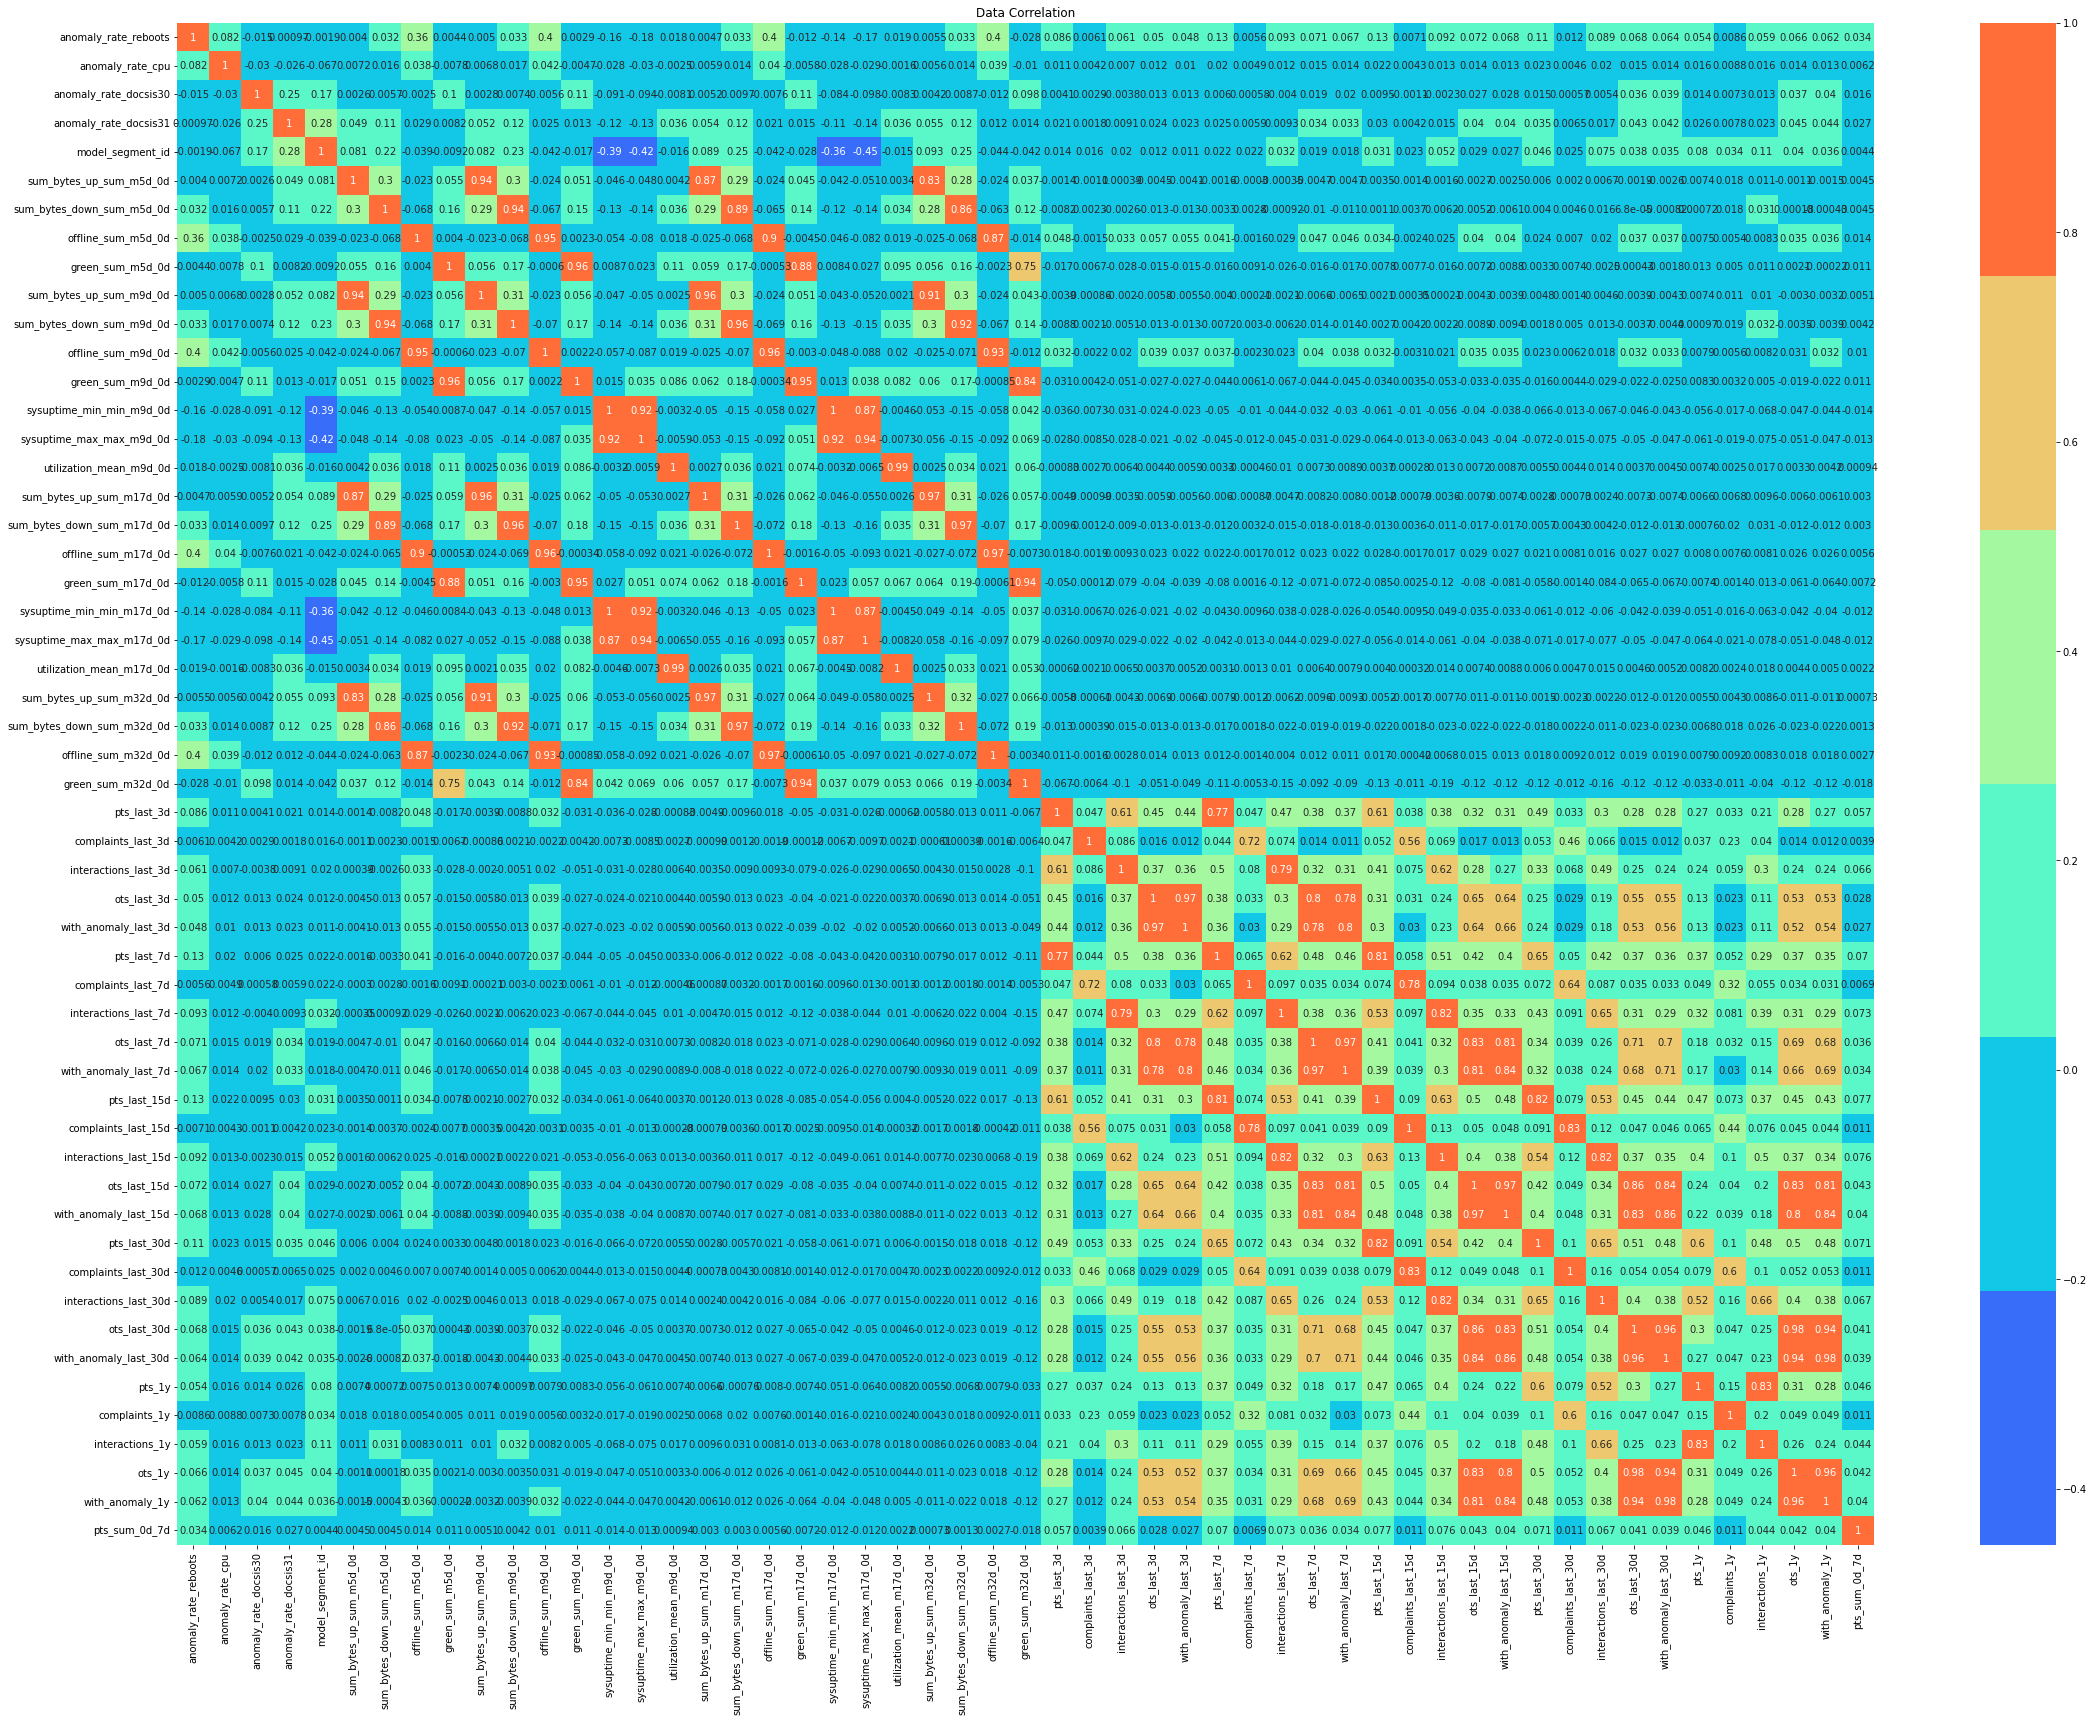

In [16]:
# Visualizamos la correlación entre las variables.

plt.figure(figsize = (38, 28))
sns.heatmap(data.corr(), annot = True, cmap= colores)
plt.title('Data Correlation')
plt.show()

Existen varios casos de multicolinealidad en los datos. Dado que vamos a utilizar un modelo que permite la selección de características, no procederemos a eliminarlas en este momento. En su lugar, evaluaremos cómo se comportan las variables en el modelo y determinaremos si es necesario realizar una selección de características más adelante.

In [17]:
# Vizualizamos los valores correlacionados con nuestra target

data.corr()['pts_sum_0d_7d'].sort_values()

green_sum_m32d_0d            -0.018184
sysuptime_min_min_m9d_0d     -0.014214
sysuptime_max_max_m9d_0d     -0.012958
sysuptime_max_max_m17d_0d    -0.012324
sysuptime_min_min_m17d_0d    -0.011823
green_sum_m17d_0d            -0.007160
sum_bytes_up_sum_m32d_0d      0.000725
utilization_mean_m9d_0d       0.000943
sum_bytes_down_sum_m32d_0d    0.001311
utilization_mean_m17d_0d      0.002168
offline_sum_m32d_0d           0.002685
sum_bytes_up_sum_m17d_0d      0.003021
sum_bytes_down_sum_m17d_0d    0.003035
complaints_last_3d            0.003924
sum_bytes_down_sum_m9d_0d     0.004184
model_segment_id              0.004436
sum_bytes_down_sum_m5d_0d     0.004469
sum_bytes_up_sum_m5d_0d       0.004540
sum_bytes_up_sum_m9d_0d       0.005098
offline_sum_m17d_0d           0.005640
anomaly_rate_cpu              0.006155
complaints_last_7d            0.006926
offline_sum_m9d_0d            0.010311
complaints_1y                 0.010593
complaints_last_15d           0.010664
complaints_last_30d      

Como hemos observado anteriormente, las demas variables muestran una correlación reducida con la variable objetivo.

#### 4.2 Distribuición y densidad

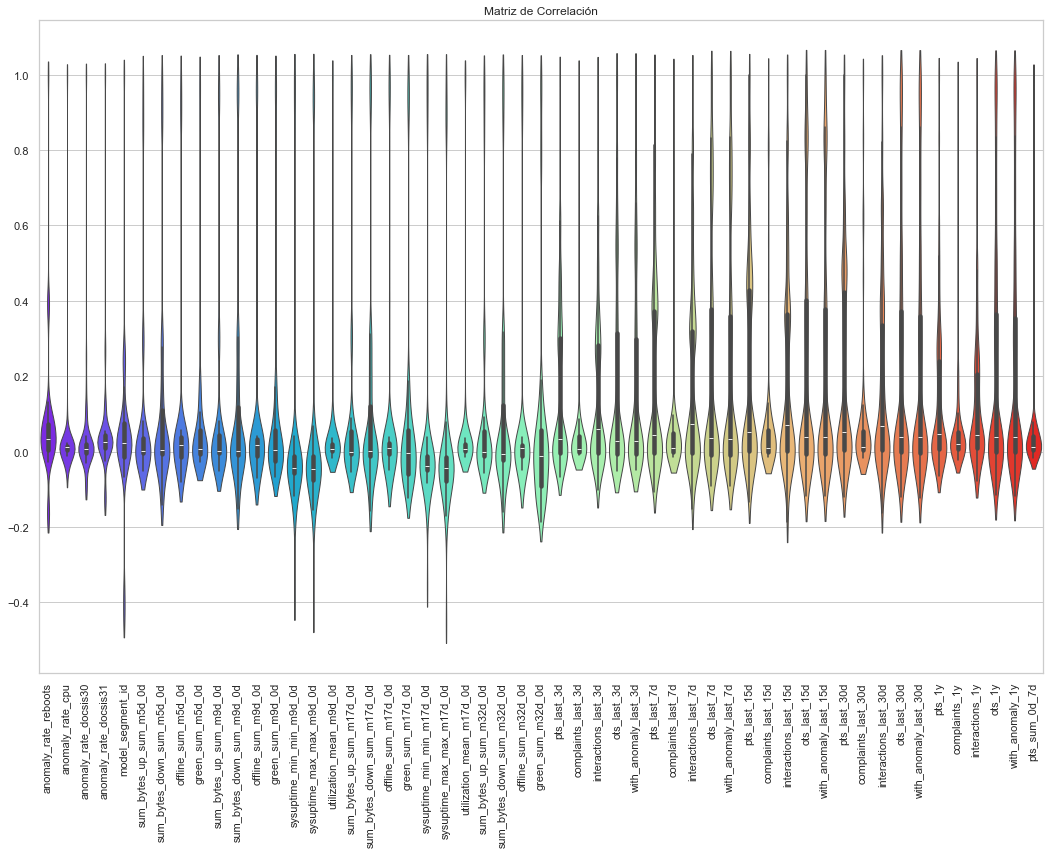

In [18]:
# Calcular la matriz de correlación
corr_df = data.corr()

# Configurar el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Crear una figura más grande para acomodar las etiquetas
plt.figure(figsize=(18, 12))

# Dibujar el gráfico de violín
sns.violinplot(data=corr_df, palette="rainbow", bw=.2, cut=1, linewidth=1)

# Ajustar la rotación de las etiquetas del eje x y establecer límites para una mejor visualización
plt.xticks(rotation=90)
plt.xlim(-0.5, len(corr_df.columns) - 0.5)

# Configurar el título del gráfico
plt.title('Matriz de Correlación')

# Mostrar el gráfico
plt.show()

Con los graficos de violinos podemos apreciar varias cosas como  la moda, la media y la mediana. La distribuicion de los datos difere un poco, pero la concentracion e los datos es muy similar. Al centrar en nuestra variable target, podemos observar que ella esta en desbalance, nos profundizaremos en esta cuestion.

#### 4.3 La variables targert "pts_sum_0d_7d"

In [19]:
# Comprobamos como esta el desbalance

data.groupby('pts_sum_0d_7d').count()

,anomaly_rate_reboots,anomaly_rate_cpu,anomaly_rate_docsis30,anomaly_rate_docsis31,model_segment_id,sum_bytes_up_sum_m5d_0d,sum_bytes_down_sum_m5d_0d,offline_sum_m5d_0d,green_sum_m5d_0d,sum_bytes_up_sum_m9d_0d,...,pts_last_30d,complaints_last_30d,interactions_last_30d,ots_last_30d,with_anomaly_last_30d,pts_1y,complaints_1y,interactions_1y,ots_1y,with_anomaly_1y
pts_sum_0d_7d,,,,,,,,,,,,,,,,,,,,,
0,41081,41081,41081,41081,41081,41081,41081,41081,41081,41081,...,41081,41081,41081,41081,41081,41081,41081,41081,41081,41081
1,58919,58919,58919,58919,58919,58919,58919,58919,58919,58919,...,58919,58919,58919,58919,58919,58919,58919,58919,58919,58919


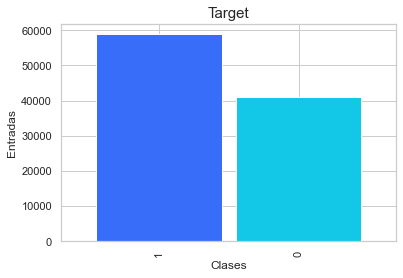

Porcentaje de 1: 58.92 %
Porcentaje de 0: 41.08 %
Diferencia entre 1 y 0: 17.84 %


In [20]:
colores = sns.color_palette("rainbow")
data['pts_sum_0d_7d'].value_counts().plot(kind='bar', figsize=(6, 4), color= colores, width = 0.90)
plt.title('Target', fontsize= 15)
plt.xlabel('Clases', fontsize=12)
plt.ylabel('Entradas', fontsize=12)
plt.show()

# Calcular el porcentaje de 1 y 0
porcentaje_1 = round(data.pts_sum_0d_7d[data.pts_sum_0d_7d == 1].count() / len(data) * 100, 2)
porcentaje_0 = round(data.pts_sum_0d_7d[data.pts_sum_0d_7d == 0].count() / len(data) * 100, 2)

# Calcular la diferencia
diferencia = round(abs(porcentaje_1 - porcentaje_0),2)

# Imprimir los resultados
print("Porcentaje de 1:", porcentaje_1, "%")
print("Porcentaje de 0:", porcentaje_0, "%")
print("Diferencia entre 1 y 0:", diferencia, "%")

El desbalance entre las clases es ligero, con una diferencia de solo un 17%. Dado que esta disparidad es relativamente pequeña, no se espera que afecte significativamente el rendimiento del modelo. Por lo tanto, decidimos mantener los datos en su estado actual y no aplicar ninguna técnica de remuestreo.

#### 4.4 Outliers y valores anomalos

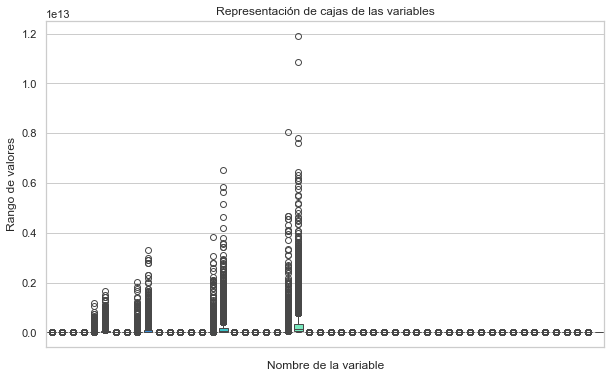

In [21]:
# Vizualización
plt.figure(figsize=(10,6))

#sns.set_theme(style="ticks", palette="pastel")
ax = sns.boxplot(data,  palette="rainbow")
ax.set_xticklabels(ax.get_xticklabels(),rotation=65)
plt.title(u'Representación de cajas de las variables')
plt.ylabel('Rango de valores')
_ = plt.xlabel('Nombre de la variable')

Es importante recordar que en este conjunto de datos, nuestro objetivo principal es detectar lo que se encuentra fuera de la normalidad, lo que podría llevar una posible reclamación. Por lo tanto, los valores anómalos desempeñan un papel fundamental en esta identificación. Por esta razón, optamos por conservarlos en el análisis.

## Experimentos

Aquí quiero destacar que con este poyecto hemos llevado a cabo varios experimentos que no están documentados aquí, como la creación de nuevas características y la eliminación de variables con alta correlación entre sí. Sin embargo, el modelo continuó mostrando un rendimiento deficiente e ineficaz.

In [22]:
# from imblearn.over_sampling import SMOTE
# oversampler = SMOTE(sampling_strategy='auto', random_state=0)

# X_balanced, y_balanced = oversampler.fit_resample(X_train, y_train)
# X_train = pd.DataFrame(data= X_balanced )
# y_train = pd.DataFrame(data= y_balanced).astype(int)
# y_test = y_test.astype(int)

In [23]:
# # Crear la nueva característica sum_bytes_combined sumando las variables originales
# data['sum_bytes_combined_up'] = data['sum_bytes_up_sum_m5d_0d'] + data['sum_bytes_up_sum_m17d_0d'] + data['sum_bytes_up_sum_m32d_0d'] + data['sum_bytes_up_sum_m9d_0d']
# data['sum_bytes_combined_down'] = data['sum_bytes_down_sum_m5d_0d'] + data['sum_bytes_down_sum_m17d_0d'] + data['sum_bytes_down_sum_m32d_0d'] + data['sum_bytes_down_sum_m9d_0d']

# # Ratio del total
# data['Upload_Download_Ratio_total'] = data['sum_bytes_combined_up'] / (data['sum_bytes_combined_down'] + 1)

In [24]:
# Diferencia entre Subida y Descarga:
# Calcula la diferencia entre la cantidad total de datos subidos y la cantidad total de datos descargados.

# data['Upload_Download_Difference_5'] = data['sum_bytes_up_sum_m5d_0d'] - data['sum_bytes_down_sum_m5d_0d']
# data['Upload_Download_Difference_9'] = data['sum_bytes_up_sum_m9d_0d'] - data['sum_bytes_down_sum_m9d_0d']
# data['Upload_Download_Difference_17'] = data['sum_bytes_up_sum_m17d_0d'] - data['sum_bytes_down_sum_m17d_0d']
# data['Upload_Download_Difference_32'] = data['sum_bytes_up_sum_m32d_0d'] - data['sum_bytes_down_sum_m32d_0d']

In [25]:
#  Diferencia entre Problemas y Conexiones "Verdes":
# # Calcula la diferencia entre las veces que el cliente quedó sin servicio y las veces que tuvo una conexión "verde".
# data['Connection_Issues_Difference_total'] = data['offline_total'] - data['green_total']

# 5) División

#### 5.1 Primero realizamos la división del DataFrame

In [26]:
# Dividimos los datos entre variables de entrada y variable a predecir

X = data.loc[:, data.columns != 'pts_sum_0d_7d']
y = data.loc[:, data.columns == 'pts_sum_0d_7d']

In [27]:
from sklearn.model_selection import train_test_split

# Ahora realizamos la division entre conjunto de treino y prueba
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.2, random_state=0)

#### 5.2 Variables Dummies

In [28]:
# Definimos un diccionario de mapeo de valores de mapeo y  aplicamos la transformación a la columna
X_train['model_segment_id'] = X_train['model_segment_id'].map({0: "zero", 1: "uno", 2: "dos", 3: "tres"})
X_test['model_segment_id'] = X_test['model_segment_id'].map({0: "zero", 1: "uno", 2: "dos", 3: "tres"})

# En este paso realizamos la transformación
X_train = pd.get_dummies(X_train, columns= ['model_segment_id'], drop_first=True)
X_test = pd.get_dummies(X_test, columns= ['model_segment_id'], drop_first=True)

# 6) Seleción del modelo

In [29]:
# Se descargan librerias

from sklearn.model_selection import cross_validate, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

#### 6.1 Validación cruzada
Utilizaremos la metrica ROC-AUC para medir el rendimiento del modelo y escoger el mejor.

In [30]:
# Crear un modelo
model0 = LogisticRegressionCV()
model1 = MLPClassifier()
model2 = DecisionTreeClassifier()
model3 = RandomForestClassifier(n_estimators=100, random_state=42)

# Realizar validación cruzada y obtener los resultados
results0 = cross_validate(model0, X_train, y_train, cv=5, scoring=['accuracy', 'roc_auc'], return_train_score=False)
results1 = cross_validate(model1, X_train, y_train, cv=5, scoring=['accuracy', 'roc_auc'], return_train_score=False)
results2 = cross_validate(model2, X_train, y_train, cv=5, scoring=['accuracy', 'roc_auc'], return_train_score=False)
results3 = cross_validate(model3, X_train, y_train, cv=5, scoring=['accuracy', 'roc_auc'], return_train_score=False)

In [31]:
# Imprimir los resultados
print("Regresión Logistica:")
print("Accuracy:", results0['test_accuracy'].mean())
print("ROC AUC:", results0['test_roc_auc'].mean())

print("\nRede Neuronal:")
print("Accuracy:", results1['test_accuracy'].mean())
print("ROC AUC:", results1['test_roc_auc'].mean())

print("\nÁrbol de Decisión:")
print("Accuracy:", results2['test_accuracy'].mean())
print("ROC AUC:", results2['test_roc_auc'].mean())

print("\nRandom Forest:")
print("Accuracy:", results3['test_accuracy'].mean())
print("ROC AUC:", results3['test_roc_auc'].mean())


Regresión Logistica:
Accuracy: 0.589075
ROC AUC: 0.49621525167545355

Rede Neuronal:
Accuracy: 0.4868625
ROC AUC: 0.5005719706309848

Árbol de Decisión:
Accuracy: 0.5507875
ROC AUC: 0.5374596527697657

Random Forest:
Accuracy: 0.6201625
ROC AUC: 0.6410203569120364


El modelo que se destacó por su rendimiento fue Random Forest, por lo tanto, continuaremos utilizándolo en este proyecto

In [32]:
# Se crea el modelo
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Realizar validación cruzada
scoring = ['accuracy', 'roc_auc']
results = cross_validate(random_forest_model, X_train, y_train, cv=5, scoring=scoring, return_train_score=False)

# Obtener las puntuaciones de precisión y AUC-ROC
accuracy_scores = results['test_accuracy']
roc_auc_scores = results['test_roc_auc']

# Calcular la precisión promedio y el área bajo la curva ROC promedio
mean_accuracy = accuracy_scores.mean()
mean_roc_auc = roc_auc_scores.mean()

# Imprimir los resultados
print("Precisión promedio en validación cruzada:", mean_accuracy)
print("Área bajo la curva ROC promedio en validación cruzada:", mean_roc_auc)


Precisión promedio en validación cruzada: 0.6201625
Área bajo la curva ROC promedio en validación cruzada: 0.6410203569120364


#### 6.2 Traning y Test

In [33]:
# Entrenar el modelo
random_forest_model.fit(X_train, y_train)

# Realizar predicciones de probabilidades en el conjunto de entrenamiento y prueba
y_train_pred_proba = random_forest_model.predict_proba(X_train)[:, 1]
y_test_pred_proba = random_forest_model.predict_proba(X_test)[:, 1]

# Aplicar un umbral de 0.5 para convertir las probabilidades en etiquetas binarias
umbral = 0.5
y_train_pred = (y_train_pred_proba >= umbral).astype(int)
y_test_pred = (y_test_pred_proba >= umbral).astype(int)

# Calcular la precisión y la ROC-AUC en los conjuntos de entrenamiento y prueba
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
roc_auc_train = roc_auc_score(y_train, y_train_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)

In [34]:
# Imprimir la precisión en ambos conjuntos
print("Precisión en el conjunto de entrenamiento:", accuracy_train)
print("Precisión en el conjunto de prueba:", accuracy_test)


# Imprimir la ROC-AUC en ambos conjuntos
print("ROC-AUC en el conjunto de entrenamiento:", roc_auc_train)
print("ROC-AUC en el conjunto de prueba:", roc_auc_test)


Precisión en el conjunto de entrenamiento: 1.0
Precisión en el conjunto de prueba: 0.63235
ROC-AUC en el conjunto de entrenamiento: 1.0
ROC-AUC en el conjunto de prueba: 0.5811173254246678


#### Se vizualiza el overfitting

Precisión en el conjunto de entrenamiento: 1.0
Precisión en el conjunto de prueba: 0.63265


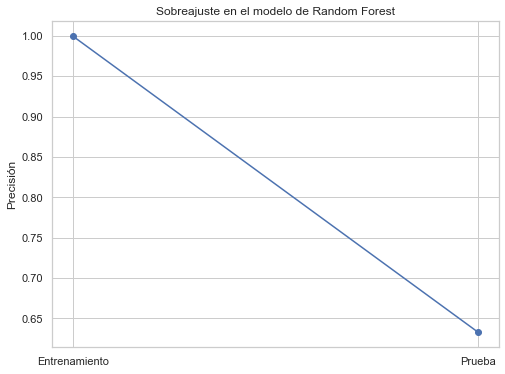

In [35]:
# Realizar predicciones en el conjunto de entrenamiento y prueba
y_train_pred = random_forest_model.predict(X_train)
y_test_pred = random_forest_model.predict(X_test)

# Calcular la precisión en los conjuntos de entrenamiento y prueba
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

# Imprimir la precisión en ambos conjuntos
print("Precisión en el conjunto de entrenamiento:", accuracy_train)
print("Precisión en el conjunto de prueba:", accuracy_test)

# Crear un gráfico para visualizar el sobreajuste
plt.figure(figsize=(8, 6))
plt.plot(["Entrenamiento", "Prueba"], [accuracy_train, accuracy_test], marker='o')
plt.title("Sobreajuste en el modelo de Random Forest")
plt.ylabel("Precisión")
plt.show()

#### 6.3 Se busca metigar el overfiting (optimizar parametros)

Se optimiza el modelo manualmente

In [36]:
# Se crea el modelo con nuevos parametros

random_forest_model_opt = RandomForestClassifier(n_estimators=50, max_depth=20, max_features='auto', min_samples_leaf=10, random_state=42)

In [37]:
# Entrenar el modelo
random_forest_model_opt.fit(X_train, y_train)

# Realizar predicciones de probabilidades en el conjunto de entrenamiento y prueba
y_train_pred_proba = random_forest_model_opt.predict_proba(X_train)[:, 1]
y_test_pred_proba = random_forest_model_opt.predict_proba(X_test)[:, 1]

# Aplicar un umbral de 0.5 para convertir las probabilidades en etiquetas binarias
umbral = 0.5
y_train_pred = (y_train_pred_proba >= umbral).astype(int)
y_test_pred = (y_test_pred_proba >= umbral).astype(int)

# Calcular la precisión y la ROC-AUC en los conjuntos de entrenamiento y prueba
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
roc_auc_train = roc_auc_score(y_train, y_train_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)

In [38]:
# Imprimir la precisión en ambos conjuntos
print("Precisión en el conjunto de entrenamiento:", accuracy_train)
print("ROC-AUC en el conjunto de entrenamiento:", roc_auc_train)


# Imprimir la ROC-AUC en ambos conjuntos
# print("ROC-AUC en el conjunto de prueba:", roc_auc_test)
# print("Precisión en el conjunto de prueba:", accuracy_test)

Precisión en el conjunto de entrenamiento: 0.7597125
ROC-AUC en el conjunto de entrenamiento: 0.7101299453352272


##### Se optimiza los parametros con GridSearchCV
Hemos optimizado los hiperparámetros utilizando GridSearchCV, sin embargo, los resultados del modelo con los hiperparámetros ajustados manualmente han sido mejores.

In [39]:
from sklearn.model_selection import GridSearchCV

# Crear un modelo Random Forest
random_forest_model = RandomForestClassifier(random_state=42)

# Definir la cuadrícula de hiperparámetros a explorar
param_grid = {
    'n_estimators': [50, 100, 200],  # Diferentes números de árboles
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras requeridas en cada hoja
}

# Realizar una búsqueda en cuadrícula con validación cruzada
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, 
                           scoring='roc_auc', cv=5, n_jobs=-1)

# Entrenar el modelo con diferentes combinaciones de hiperparámetros
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo y sus hiperparámetros
best_random_forest = grid_search.best_estimator_
best_params = grid_search.best_params_

# Realizar predicciones en el conjunto de prueba con el mejor modelo
y_pred = best_random_forest.predict_proba(X_test)[:, 1]

# Evaluar el rendimiento del modelo optimizado
roc_auc = roc_auc_score(y_test, y_pred)
print("Mejor ROC-AUC del modelo de Random Forest:", roc_auc)
print("Mejores hiperparámetros:", best_params)

Mejor ROC-AUC del modelo de Random Forest: 0.6672535501490311
Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [40]:
# Evaluar el rendimiento del modelo optimizado
roc_auc = roc_auc_score(y_test, y_pred)
print("Mejor ROC-AUC del modelo de Random Forest:", roc_auc)
print("Mejores hiperparámetros:", best_params)

Mejor ROC-AUC del modelo de Random Forest: 0.6672535501490311
Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [41]:
# Realizar predicciones de probabilidades en el conjunto de entrenamiento y prueba
y_train_pred_proba = grid_search.predict_proba(X_train)[:, 1]
y_test_pred_proba = grid_search.predict_proba(X_test)[:, 1]

# Aplicar un umbral de 0.5 para convertir las probabilidades en etiquetas binarias
umbral = 0.5
y_train_pred = (y_train_pred_proba >= umbral).astype(int)
y_test_pred = (y_test_pred_proba >= umbral).astype(int)

# Calcular la precisión y la ROC-AUC en los conjuntos de entrenamiento y prueba
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
roc_auc_train = roc_auc_score(y_train, y_train_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)

In [42]:
# Imprimir la precisión en ambos conjuntos
print("Precisión en el conjunto de entrenamiento:", accuracy_train)
print("Precisión en el conjunto de prueba:", accuracy_test)


# Imprimir la ROC-AUC en ambos conjuntos
print("ROC-AUC en el conjunto de entrenamiento:", roc_auc_train)
print("ROC-AUC en el conjunto de prueba:", roc_auc_test)

Precisión en el conjunto de entrenamiento: 1.0
Precisión en el conjunto de prueba: 0.63785
ROC-AUC en el conjunto de entrenamiento: 1.0
ROC-AUC en el conjunto de prueba: 0.5846790839459508


El modelo optimizado mediante GridSearch crea la ilusión de que ofrece un mejor rendimiento. Sin embargo llevar a un peor resultado ya que el modelo sufru sobreajustar (overfit) los datos. En este proyecto, con el objetivo de mitigar este problema, optamos por el modelo con parámetros optimizados manualmente, que se ajusta mejor a las necesidades específicas de nuestro problema.

#### Mas metricas

In [43]:
from sklearn.metrics import classification_report

# Generar un informe de clasificación
classification_rep = classification_report(y_test, (y_test_pred_proba >= 0.5).astype(int))

print("Informe de Clasificación:")
print(classification_rep)


Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.63      0.29      0.39      8216
           1       0.64      0.88      0.74     11784

    accuracy                           0.64     20000
   macro avg       0.63      0.58      0.57     20000
weighted avg       0.64      0.64      0.60     20000



#### 6.3 Matriz de Confusión

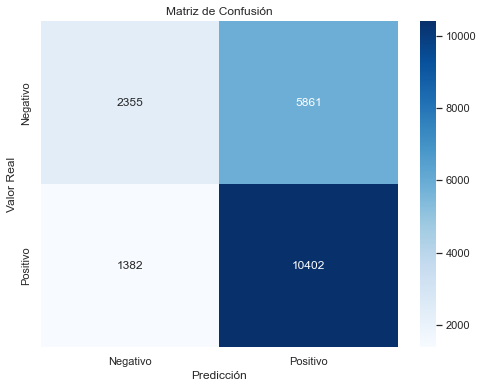

In [44]:
# Calcular la matriz de confusión
confusion = confusion_matrix(y_test, y_test_pred).astype(int)

# Crear una figura de Matplotlib
plt.figure(figsize=(8, 6))

# Usar Seaborn para crear un mapa de calor de la matriz de confusión
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])

# Configurar etiquetas y título
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')

# Mostrar la matriz de confusión
plt.show()


* Verdaderos negativos (TN):  Hay 1056 verdaderos negativos, lo que significa que se clasificaron correctamente 1056 ejemplos como negativos.
* Falsos positivos (FP): Se tiene 7160 falsos positivos, lo que indica que se clasificaron incorrectamente 7160 ejemplos como positivos cuando en realidad eran negativos.
* Falsos negativos (FN): Se observan 807 falsos negativos, lo que implica que se clasificaron incorrectamente 807 ejemplos como negativos cuando en realidad eran positivos.
* Verdaderos positivos (TP):  10977 verdaderos positivos, lo que significa que se clasificaron correctamente 10977 ejemplos como positivos.


Si recordamos que nuestro objetivo principal es identificar anomalías, el problema más relevante se relaciona con los 807 falsos negativos. Estos casos se clasificaron erróneamente como negativos cuando en realidad eran positivos. Aunque el número de falsos negativos es relativamente bajo en comparación con los otros valores de la matriz de confusión, son especialmente críticos en el contexto de detección de anomalías. Estos casos pueden representar situaciones en las que no se detectaron anomalías que deberían haberse identificado, lo que podría tener consecuencias significativas. Por lo tanto, es esencial abordar y reducir la cantidad de falsos negativos para mejorar la efectividad de nuestro modelo en la identificación de anomalías.


#### 6.4 Vizualización de la area bajo la curva

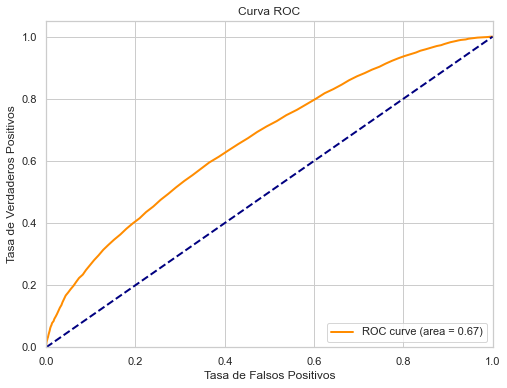

Precisión en el conjunto de prueba: 0.63785


In [45]:
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)

# Calcular el valor ROC-AUC
roc_auc = roc_auc_score(y_test, y_test_pred_proba)

# Dibujar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()
print("Precisión en el conjunto de prueba:", accuracy_test)


Un área bajo la curva (AUC) de 0.61 indica el rendimiento del modelo en términos de su capacidad para distinguir entre las clases positivas y negativas. En el contexto de un modelo de clasificación, un AUC de 0.61 sugiere que el modelo tiene un rendimiento insatisfactorio para discriminar entre estas clases.